In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import zipfile
import pandas as pd
train=pd.read_csv('/content/drive/My Drive/BTP_DATA/train/train.csv')
test=pd.read_csv('/content/drive/My Drive/BTP_DATA/test/test.csv')

Class Distribution:
 jackhammer          668
engine_idling       624
siren               607
children_playing    600
street_music        600
air_conditioner     600
drilling            600
dog_bark            600
car_horn            306
gun_shot            230
Name: Class, dtype: int64


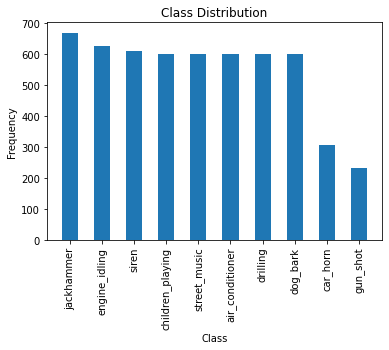

In [4]:
train['Class'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Class'].value_counts().index, train['Class'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Class Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Frequency')
print('Class Distribution:\n',train['Class'].value_counts())

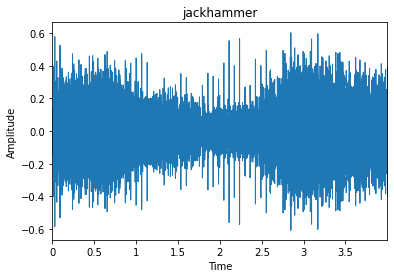

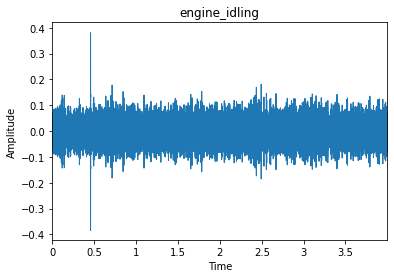

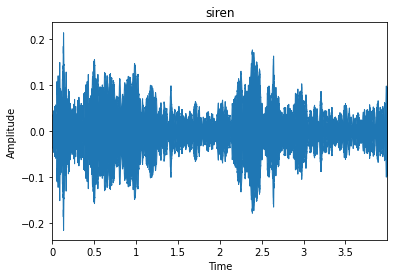

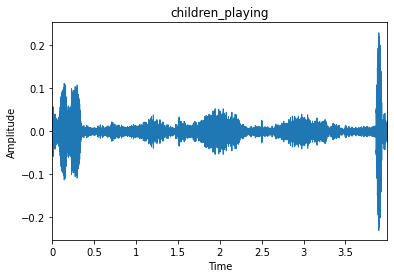

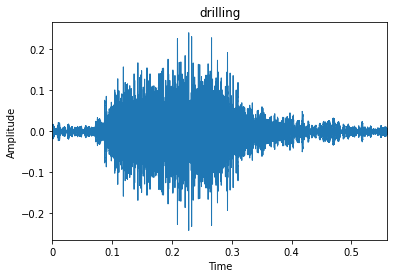

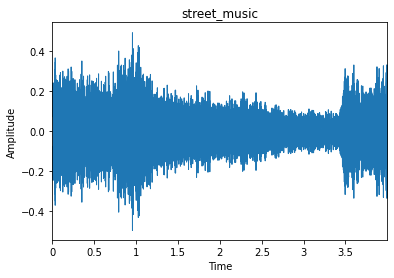

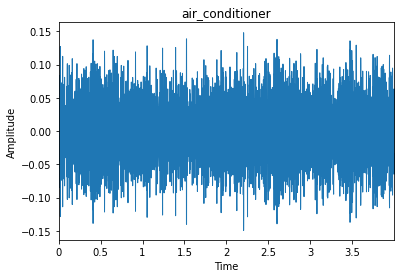

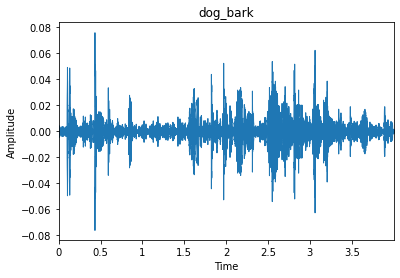

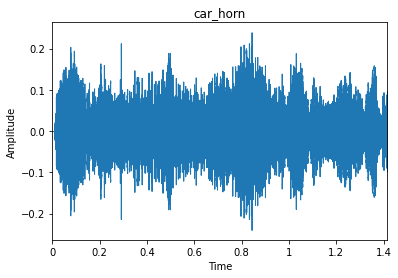

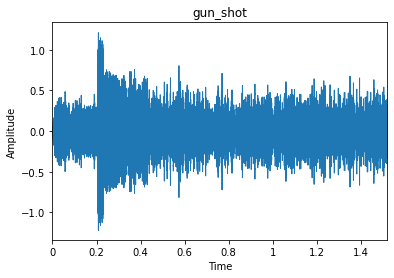

In [5]:
Classes=['jackhammer','engine_idling','siren','children_playing','drilling','street_music','air_conditioner','dog_bark','car_horn','gun_shot']

import librosa
import librosa.display
import random

def get_index(c): #function to randomize the index of the classes
  return random.choice(train.loc[train.Class==c].index)

for i in range(len(Classes)):
  j=get_index(Classes[i])
  x, sr = librosa.load('/content/drive/My Drive/BTP_DATA/train/Train/' + str(train.ID[j]) + '.wav')

  plt.figure(figsize=(6, 4))
  librosa.display.waveplot(x, sr=sr)
  plt.ylabel('Amplitude')
  plt.title(train.Class[j])
  plt.pause(0.05)


  
plt.show()

In [ ]:
features=[]
labels=[]
for i in range(len(train)):
  filename='/content/drive/My Drive/BTP_DATA/train/Train/' + str(train.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  features.append(np.mean(librosa.feature.mfcc(x, sr=sample_rate, n_mfcc=40).T,axis=0))
  labels.append(train.Class[i])

In [ ]:
features_test=[]
for i in range(len(test)):
  filename='/content/drive/My Drive/BTP_DATA/test/Test/' + str(test.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  features_test.append(np.mean(librosa.feature.mfcc(x, sr=sample_rate, n_mfcc=40).T,axis=0))

In [ ]:
x=np.array(features)
x_test=np.array(features_test)

#encoding the labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

In [ ]:
print('Shape of Features(Train): ',x.shape)
print('Shape of Features(Test): ',x_test.shape)
print('Shape of Labels(Train): ',y.shape)

Shape of Features(Train):  (5435, 40)
Shape of Features(Test):  (3297, 40)
Shape of Labels(Train):  (5435, 10)


In [ ]:

import tensorflow as tf
#from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(256,activation='relu',input_shape=(40,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:

reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(x,y, batch_size=32, epochs=100, validation_split=0.1,callbacks=[reduce])

Epoch 1/100
153/153 [==============================] - 0s 3ms/step - loss: 11.3570 - accuracy: 0.1750 - val_loss: 2.1603 - val_accuracy: 0.2518
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 2.4573 - accuracy: 0.2171 - val_loss: 2.1175 - val_accuracy: 0.2445
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 2.1583 - accuracy: 0.2619 - val_loss: 1.9800 - val_accuracy: 0.3474
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 1.9989 - accuracy: 0.2826 - val_loss: 1.8512 - val_accuracy: 0.4210
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 1.8885 - accuracy: 0.3237 - val_loss: 1.7214 - val_accuracy: 0.4632
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 1.8325 - accuracy: 0.3615 - val_loss: 1.6330 - val_accuracy: 0.4779
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 1.7239 - accuracy: 0.3919 - val_loss: 1.5257 - val_accuracy: 0.514

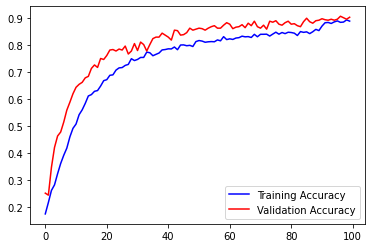

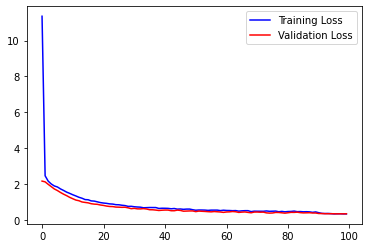

In [ ]:
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
pred1=model1.predict(x_test)
b=np.argmax(pred1,axis=1)
pred_test=le.inverse_transform(b)

In [ ]:
out_df = pd.DataFrame({'ID':test['ID'].values})
out_df .insert(loc=0, column='Class', value=pred_test)
out_df.to_csv('/content/drive/My Drive/BTP_DATA/submission1.csv', index=False)

In [ ]:
s=pd.read_csv('/content/drive/My Drive/BTP_DATA/submission1.csv')
s.head(5)

,Class,ID
0,drilling,5
1,dog_bark,7
2,drilling,8
3,children_playing,9
4,engine_idling,13


In [ ]:
model1.save("/content/drive/My Drive/BTP_DATA/model1.h5")

In [ ]:
mfccs=[]
for i in range(len(train[:10])):
  file_name='/content/drive/My Drive/BTP_DATA/train/Train/' + str(train.ID[i+100]) + '.wav'
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mfccs.append(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40))

In [ ]:
for i in range(len(mfccs)):
  print(len(mfccs[i][0]))

173
99
173
173
173
95
173
173
173
127


In [ ]:
max_pad_len=174 # I am defining a maximum length for each column 

file_name='/content/drive/My Drive/BTP_DATA/train/Train/12.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfcc=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print('Shape of feature matrix: ',mfcc.shape)
pad_width = max_pad_len - mfcc.shape[1]
print('Pad width: ',pad_width)
mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
print('Shape of feature matrix after padding: ',mfcc.shape)

Shape of feature matrix:  (40, 50)
Pad width:  124
Shape of feature matrix after padding:  (40, 174)


In [ ]:
features_new=[]
labels=[]
max_pad_len=174 

for i in range(len(train)):
  filename='/content/drive/My Drive/BTP_DATA/train/Train/' + str(train.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  mfcc=librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40)
  pad_width = max_pad_len - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  features_new.append(mfcc)
  labels.append(train.Class[i])

In [ ]:
features_new_test=[]
max_pad_len=174 

for i in range(len(test)):
  filename='/content/drive/My Drive/BTP_DATA/test/Test/' + str(test.ID[i]) + '.wav'
  x, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
  mfcc=librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40)
  pad_width = max_pad_len - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  features_new_test.append(mfcc)

In [ ]:
x_new=np.array(features_new)  #coverting the features vector to a numpy array
x_new=x_new.reshape(x_new.shape[0], 40, 174, 1) #reshaping the array for the convolution layer input

x_new_test=np.array(features_new_test)  
x_new_test=x_new_test.reshape(x_new_test.shape[0], 40, 174, 1)

#encoding the labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

In [ ]:
print('Shape of Features(Train): ',x_new.shape)
print('Shape of Features(Test): ',x_new_test.shape)
print('Shape of Labels(Train): ',y.shape)

Shape of Features(Train):  (5435, 40, 174, 1)
Shape of Features(Test):  (3297, 40, 174, 1)
Shape of Labels(Train):  (5435, 10)


In [ ]:
model2=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(40,174,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:

reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2=model2.fit(x_new,y, batch_size=32, epochs=100, validation_split=0.1,callbacks=[reduce])

Epoch 1/100
153/153 [==============================] - 29s 192ms/step - loss: 2.6634 - accuracy: 0.1349 - val_loss: 2.1680 - val_accuracy: 0.2684
Epoch 2/100
153/153 [==============================] - 29s 191ms/step - loss: 1.9531 - accuracy: 0.2805 - val_loss: 1.9208 - val_accuracy: 0.3143
Epoch 3/100
153/153 [==============================] - 29s 189ms/step - loss: 1.6313 - accuracy: 0.4103 - val_loss: 1.5814 - val_accuracy: 0.5092
Epoch 4/100
153/153 [==============================] - 29s 188ms/step - loss: 1.4335 - accuracy: 0.4823 - val_loss: 1.4050 - val_accuracy: 0.5607
Epoch 5/100
153/153 [==============================] - 29s 190ms/step - loss: 1.2718 - accuracy: 0.5486 - val_loss: 1.1649 - val_accuracy: 0.6048
Epoch 6/100
153/153 [==============================] - 29s 191ms/step - loss: 1.1210 - accuracy: 0.5997 - val_loss: 1.1117 - val_accuracy: 0.6342
Epoch 7/100
153/153 [==============================] - 29s 191ms/step - loss: 0.9935 - accuracy: 0.6581 - val_loss: 0.9404 -

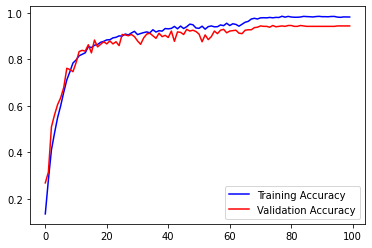

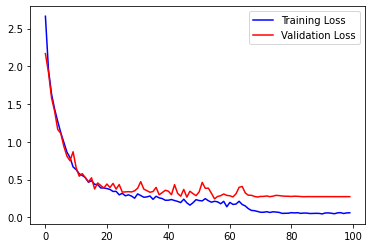

In [ ]:
%matplotlib inline
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
pred2=model2.predict(x_new_test)
b=np.argmax(pred2,axis=1)
pred_test2=le.inverse_transform(b)

In [ ]:
ut_df = pd.DataFrame({'ID':test['ID'].values})
out_df .insert(loc=0, column='class_test', value=pred_test2)
out_df.to_csv('/content/drive/My Drive/BTP_DATA/submission2.csv', index=False)

In [ ]:
model2.save("/content/drive/My Drive/BTP_DATA/train/model2.h5")